# Learning Decision tree training and Testing using Hold-Out method

# The code below demonstrates how Decision tree model is trained and tested under Hold-Out method. For better understanding, codes below explains building and testing Decision tree model on data set supported in scikit learn and user specific data set. 


# 1. Loading libraries

In [1]:
import pandas as pd # imports pandas for data structure support
from sklearn import datasets # imports built in data sets supported in scikit learn 
from sklearn import tree   # imports Decision tree classifier
from sklearn import metrics # imports performance metrices
from sklearn.model_selection import train_test_split # using scikit learn for hold-out

# 2. Loading data set

In [2]:
# Loading load_wine() data set 

dataset_wine = datasets.load_wine()



# 3. Creating Hold-out Enviornment

In [3]:
# Creating hold-out enviornment

winedata_train, winedata_test, winetarget_train, winetarget_test = train_test_split(dataset_wine.data, dataset_wine.target, test_size=0.3)

# 4.  Building Decision tree model 

We will use training data set created in step 3 for model training(or learning)

In [4]:
#Create a Decision tree Classifier

DTmodel_1 = tree.DecisionTreeClassifier() 

#Train the model using the training sets

DTfitted_1 = DTmodel_1.fit(winedata_train, winetarget_train)

# 5. Testing trained Decision tree model on the test set 

In [6]:

#Predict the response on the test data set

DT_predictions_1 = DTfitted_1.predict((winedata_test))

# 6. Evaluating the performance of the model 

In [7]:
# Computing Model Accuracy

print("Accuracy:",round(metrics.accuracy_score(winetarget_test, DT_predictions_1),2) * 100, "%")

print ("---------------")

# Printing confusion matrix

print ("Confusion matrix")

print ("---------------")

print(metrics.confusion_matrix(winetarget_test, DT_predictions_1))

# Model detailed classification report
target_names = ['class 0', 'class 1', 'class 2']


print ("---------------")

print("Classification report", metrics.classification_report(winetarget_test, DT_predictions_1,target_names =target_names))

Accuracy: 94.0 %
---------------
Confusion matrix
---------------
[[17  2  0]
 [ 1 17  0]
 [ 0  0 17]]
---------------
Classification report              precision    recall  f1-score   support

    class 0       0.94      0.89      0.92        19
    class 1       0.89      0.94      0.92        18
    class 2       1.00      1.00      1.00        17

avg / total       0.95      0.94      0.94        54



# Decision Tree on user specific data set

# 1. Loading data set

In [8]:
# Loading data set from local machine. The data set on predicting liver disorder.
    
My_dataset = pd.read_csv('/Users/sakshibabbar/Documents/ML/Supervised learning/datasets/liver_dataset.csv')

# 2. Dividing data set into sets  of indicator and predictive variables

In [9]:
# My_data contains all data points from My_data set from from first feature to  6th feature(indicator features)
My_data = My_dataset.iloc[:,0:6].values 

# My_target contains class information which is 7th feature in the data set of all the data points in My_dataset

My_target=My_dataset.iloc[:,6].values 

# 3. Creating Hold-out enviornment for the data set in step above

In [10]:
#  The pair of arrays liverdata_train and  livertarget_train will be used for learning the sueprvised model. 
# Whereas, liverdata_test and  livertarget_test for model testing

liverdata_train, liverdata_test, livertarget_train, livertarget_test = train_test_split(My_data, My_target, test_size=0.3)



# 4.  Building Decision tree model

In [13]:

DTmodel_2 = tree.DecisionTreeClassifier()  

#Train the model using the training sets

DTfitted_2 = DTmodel_2.fit(liverdata_train, livertarget_train)

# 5. Testing trained Decision tree model on the test set

In [14]:

#Predict the response on the test data set

DT_predictions_2 = DTfitted_2.predict((liverdata_test))

# 6. Evaluating the performance of the model

In [15]:
# Computing Model Accuracy

print("Accuracy:",round(metrics.accuracy_score(livertarget_test, DT_predictions_2),2) * 100, "%")

print ("---------------")

# Printing confusion matrix


print ("Confusion matrix")

print ("---------------")
print(metrics.confusion_matrix(livertarget_test, DT_predictions_2))


# User specific target names   
    
target_names = ['disorder', 'nodisorder']

# Model detailed classification report

print ("---------------")
print("Classification report", metrics.classification_report(livertarget_test, DT_predictions_2,target_names =target_names))

Accuracy: 62.0 %
---------------
Confusion matrix
---------------
[[23 16]
 [24 41]]
---------------
Classification report              precision    recall  f1-score   support

   disorder       0.49      0.59      0.53        39
 nodisorder       0.72      0.63      0.67        65

avg / total       0.63      0.62      0.62       104



# Visualize Decision tree model

In [16]:
# importing libraries

from IPython.display import Image  
import pydotplus

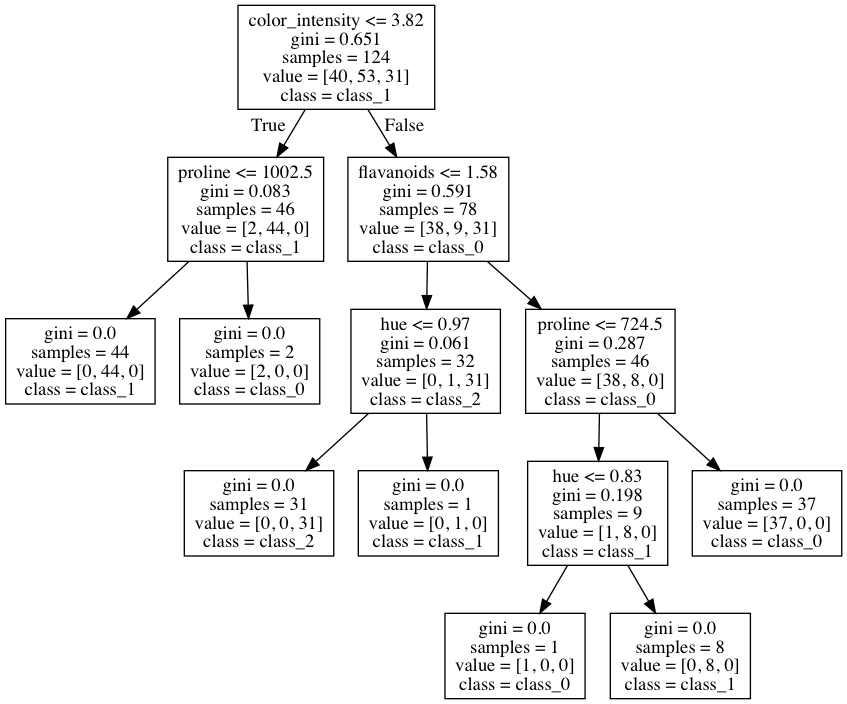

In [17]:
# Create DOT data. The first argument in tree.export_graphviz is the model name, out_file is used to write 
# model into out_file, next parameters are information on indicator and predictive parameters 

dot_data = tree.export_graphviz(DTmodel_1, out_file=None, feature_names=dataset_wine.feature_names, class_names=dataset_wine.target_names)

# Draw graph

graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())